<!-- # Preprocessing -->
# imports

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime,timedelta
connection_post = sqlite3.connect('cruise_post.db')
connection_pre = sqlite3.connect('cruise_pre.db')
df_pre = pd.read_sql_query("SELECT * FROM cruise_pre",connection_pre,index_col="index")
df_post = pd.read_sql_query("SELECT * FROM cruise_post",connection_post,index_col="index")
connection_post.close()
connection_pre.close()

# Basic information and statistics

information such as data size, features to be compared to the assessment questions documents' feature descriptions.
common statistics to see the numerical features' data overall patterns  

In [2]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133746 entries, 0 to 133745
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Gender                                      120290 non-null  object 
 1   Date of Birth                               119062 non-null  object 
 2   Source of Traffic                           133746 non-null  object 
 3   Onboard Wifi Service                        114254 non-null  object 
 4   Embarkation/Disembarkation time convenient  118103 non-null  float64
 5   Ease of Online booking                      115391 non-null  float64
 6   Gate location                               116606 non-null  float64
 7   Logging                                     133746 non-null  object 
 8   Onboard Dining Service                      116937 non-null  object 
 9   Online Check-in                             118059 non-null  float64
 

In [3]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133746 entries, 0 to 133745
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Cruise Name      117815 non-null  object 
 1   Ticket Type      113685 non-null  object 
 2   Cruise Distance  119260 non-null  object 
 3   Ext_Intcode      133746 non-null  object 
 4   WiFi             64012 non-null   float64
 5   Dining           133746 non-null  int64  
 6   Entertainment    73689 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ MB


In [4]:
df_pre.describe()

,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Online Check-in,Cabin Comfort,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness
count,118103.000000,115391.000000,116606.000000,118059.000000,113494.000000,119914.000000,113453.000000,119399.000000,115419.000000,115344.000000
mean,3.055850,2.758170,2.978526,3.249884,3.439574,3.383925,3.633416,3.308470,3.641844,3.285745
std,1.526012,1.401888,1.277984,1.350811,1.321604,1.287508,1.178899,1.266476,1.177988,1.313328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df_post.describe()

,WiFi,Dining,Entertainment
count,64012.000000,133746.000000,73689.000000
mean,0.500578,0.499290,0.503142
std,0.500004,0.500001,0.499994
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [6]:
df_pre.sample(10)

,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode
index,,,,,,,,,,,,,,,,,,
109205,Male,22/01/1995,Direct - Email Marketing,Very important,5.0,4.0,5.0,18/07/2023 13:08,None,4.0,NaN,Somewhat important,4.0,4.0,4.0,5.0,3.0,LB566KSWJOZ
42490,None,19/05/1969,Direct - Company Website,Very important,1.0,4.0,1.0,19/03/2023 9:35,Extremely important,4.0,5.0,Extremely important,4.0,1.0,2.0,1.0,5.0,LB377BXZUFI
82469,Male,01/02/1993,Direct - Email Marketing,Extremely important,4.0,NaN,3.0,30/05/2023 19:29,Extremely important,5.0,5.0,Extremely important,5.0,3.0,4.0,2.0,NaN,BL590HCIXUZ
30777,Male,03/06/1987,Direct - Company Website,Very important,4.0,3.0,4.0,25/02/2023 19:35,A little important,4.0,4.0,Very important,4.0,NaN,3.0,4.0,4.0,BL946FYRGWC
87917,Female,09/04/1981,Indirect - Social Media,A little important,2.0,2.0,3.0,09/06/2023 18:59,Not at all important,NaN,1.0,Not at all important,3.0,4.0,4.0,3.0,1.0,LB187HEALZK
43579,Male,09/05/2012,Direct - Company Website,None,0.0,0.0,NaN,21/03/2023 8:18,Not at all important,0.0,1.0,Not at all important,3.0,3.0,2.0,4.0,1.0,LB519SEWEOZ
78843,Female,08/02/1970,Direct - Company Website,Extremely important,NaN,5.0,5.0,24/05/2023 1:10,Extremely important,NaN,5.0,None,5.0,5.0,5.0,5.0,3.0,LB708MTXSRH
44721,Female,None,Direct - Email Marketing,Somewhat important,1.0,3.0,2.0,23/03/2023 9:36,Somewhat important,5.0,5.0,Not at all important,4.0,3.0,5.0,1.0,5.0,LB172DRULRG
119967,Female,1890-08-14,Indirect - Social Media,A little important,2.0,2.0,2.0,07/08/2023 7:55,Somewhat important,2.0,4.0,Somewhat important,NaN,2.0,2.0,2.0,3.0,LB802LKMCDN


In [7]:
df_post.sample(10)

,Cruise Name,Ticket Type,Cruise Distance,Ext_Intcode,WiFi,Dining,Entertainment
index,,,,,,,
10782,Blastoise,Standard,None,LB291GASOMD,NaN,1,NaN
2889,Blastoise,Luxury,628 KM,LB871SROOAD,0.0,0,1.0
49868,Blastoise,Luxury,1621 Miles,LB371SQYOTX,1.0,0,0.0
100883,Blastoise,Luxury,551 KM,BL587WRRYXC,1.0,0,0.0
4331,Blastoise,Standard,594 KM,BL194JFJAQN,NaN,0,NaN
94837,Blastoise,Luxury,2813 KM,LB531OKRYUW,0.0,0,0.0
92754,Blastoise,Standard,296 KM,LB316EHWLSU,NaN,0,NaN
102775,Blastoise,None,2248 KM,BL423IOIYZG,0.0,0,1.0
24150,Lapras,None,964 KM,BL541GMFWEZ,NaN,1,NaN


### Findings

There are many nans in the data set. Both dfs are of the same size.  
There are some feature engineering opportunities from categorial data to numerical.   
Especially those from importance scale.  

# Visualisation of missing values

Matrix plot to find pattern of missingness in the datasets.  
  
Bar chart to visualise how many missing values in each column of the datasets.  
  
Heat map shows the correlations between every 2 columns.
  
### `df_pre`

<AxesSubplot:>

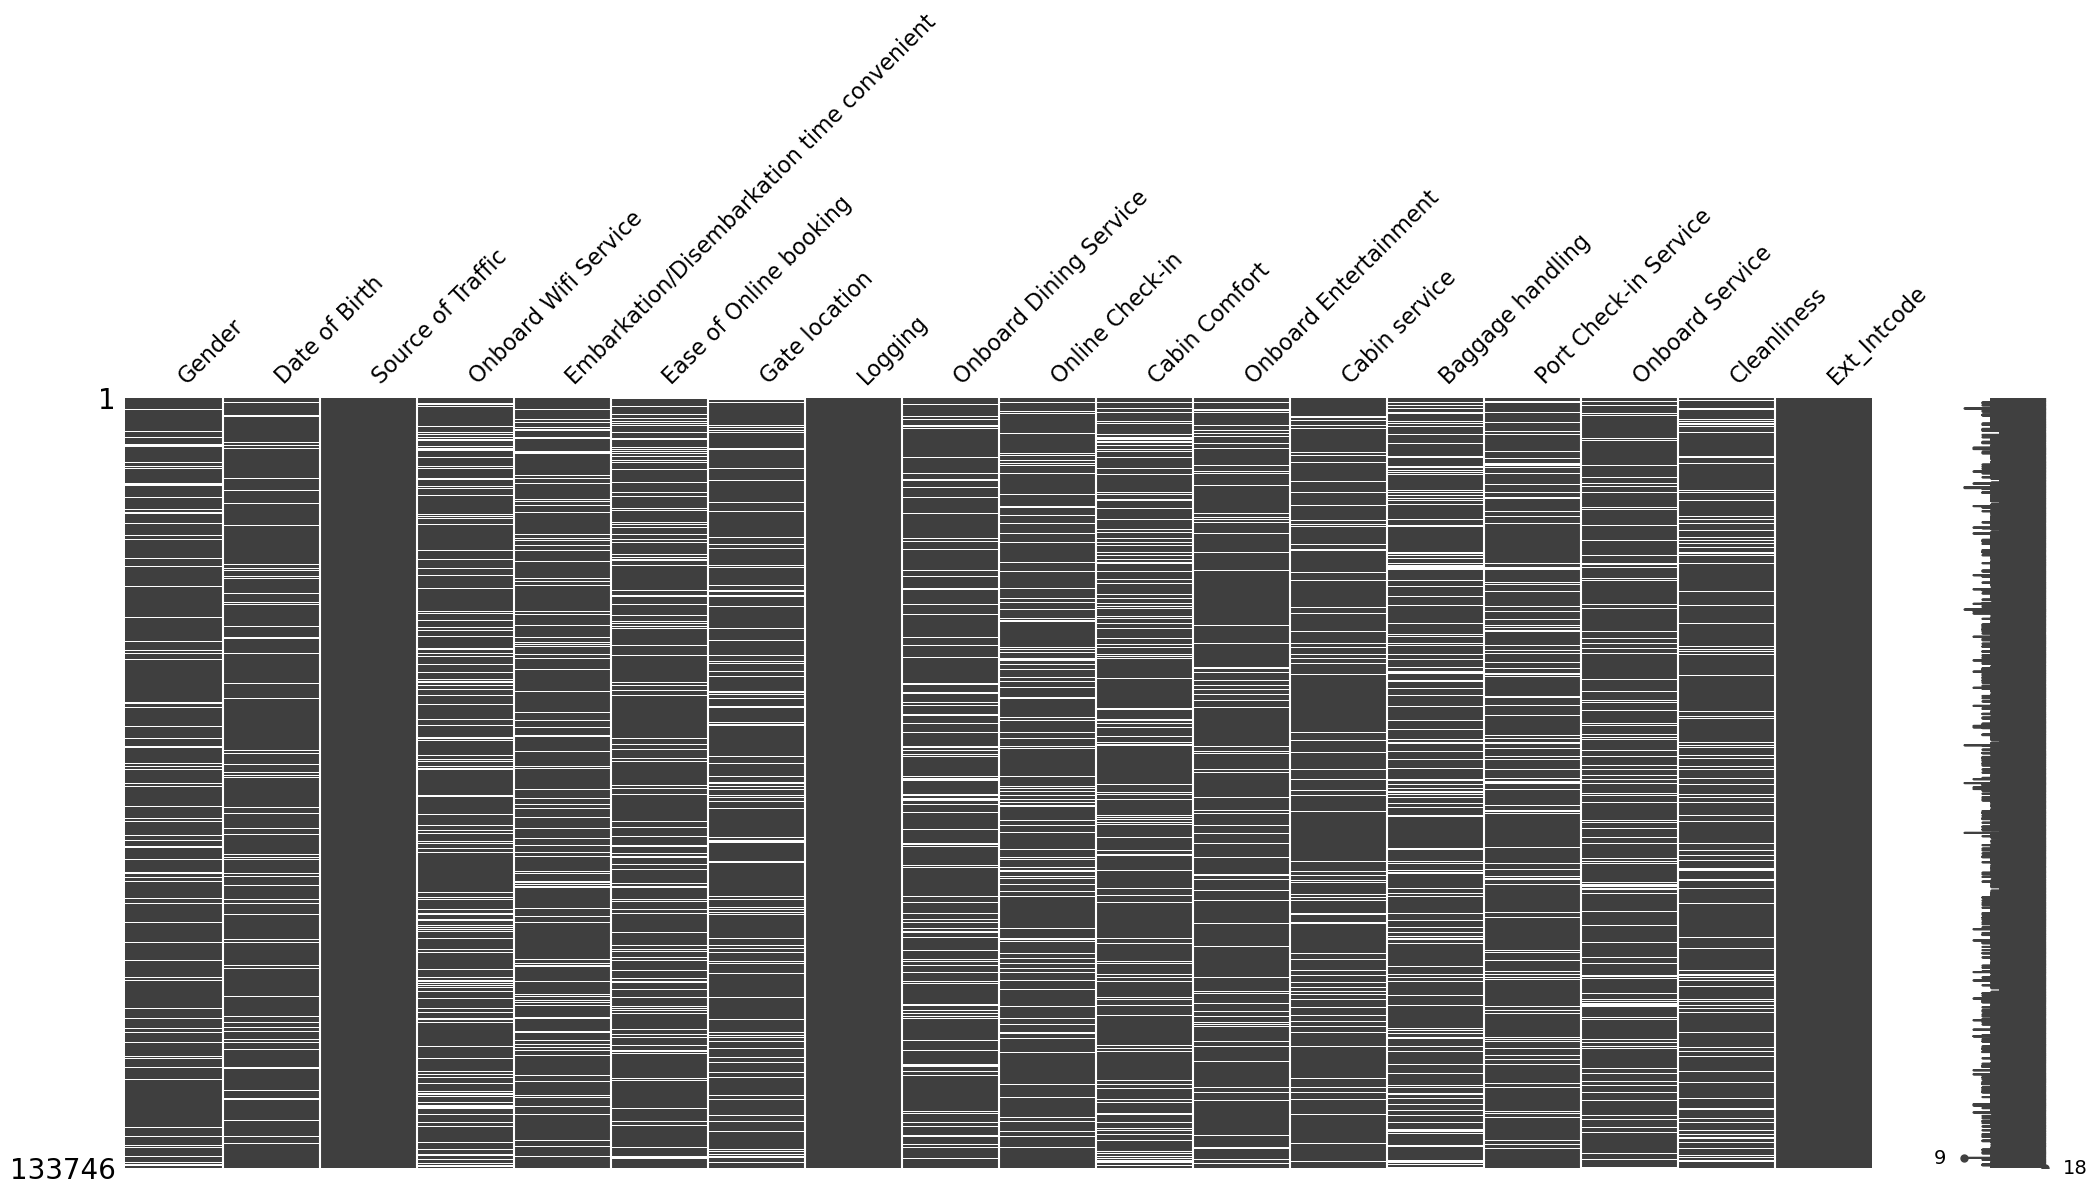

In [8]:
msno.matrix(df_pre)

<AxesSubplot:>

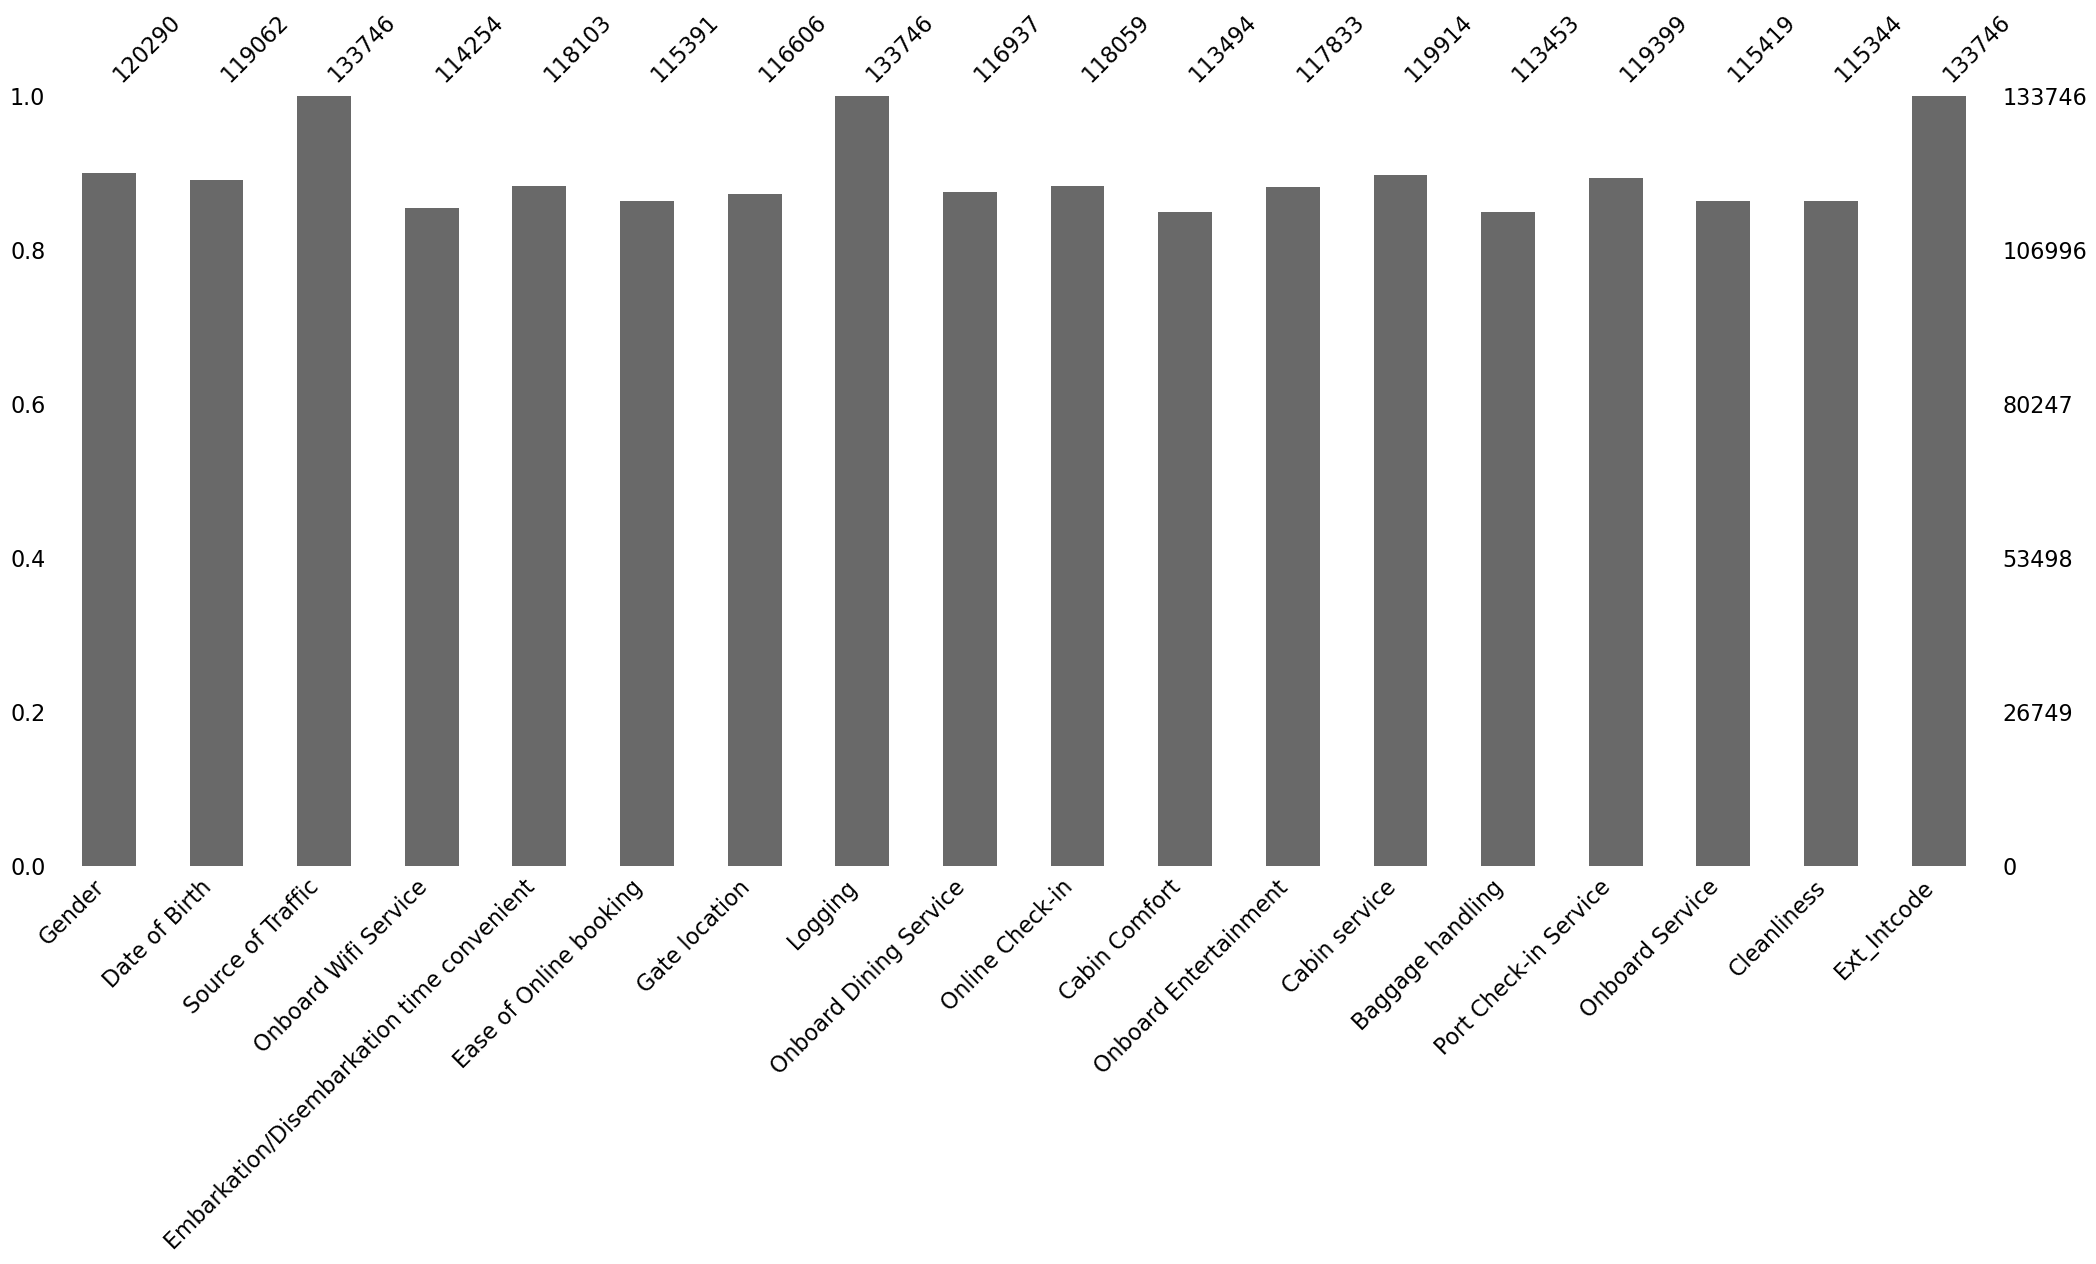

In [9]:
msno.bar(df_pre)

<AxesSubplot:>

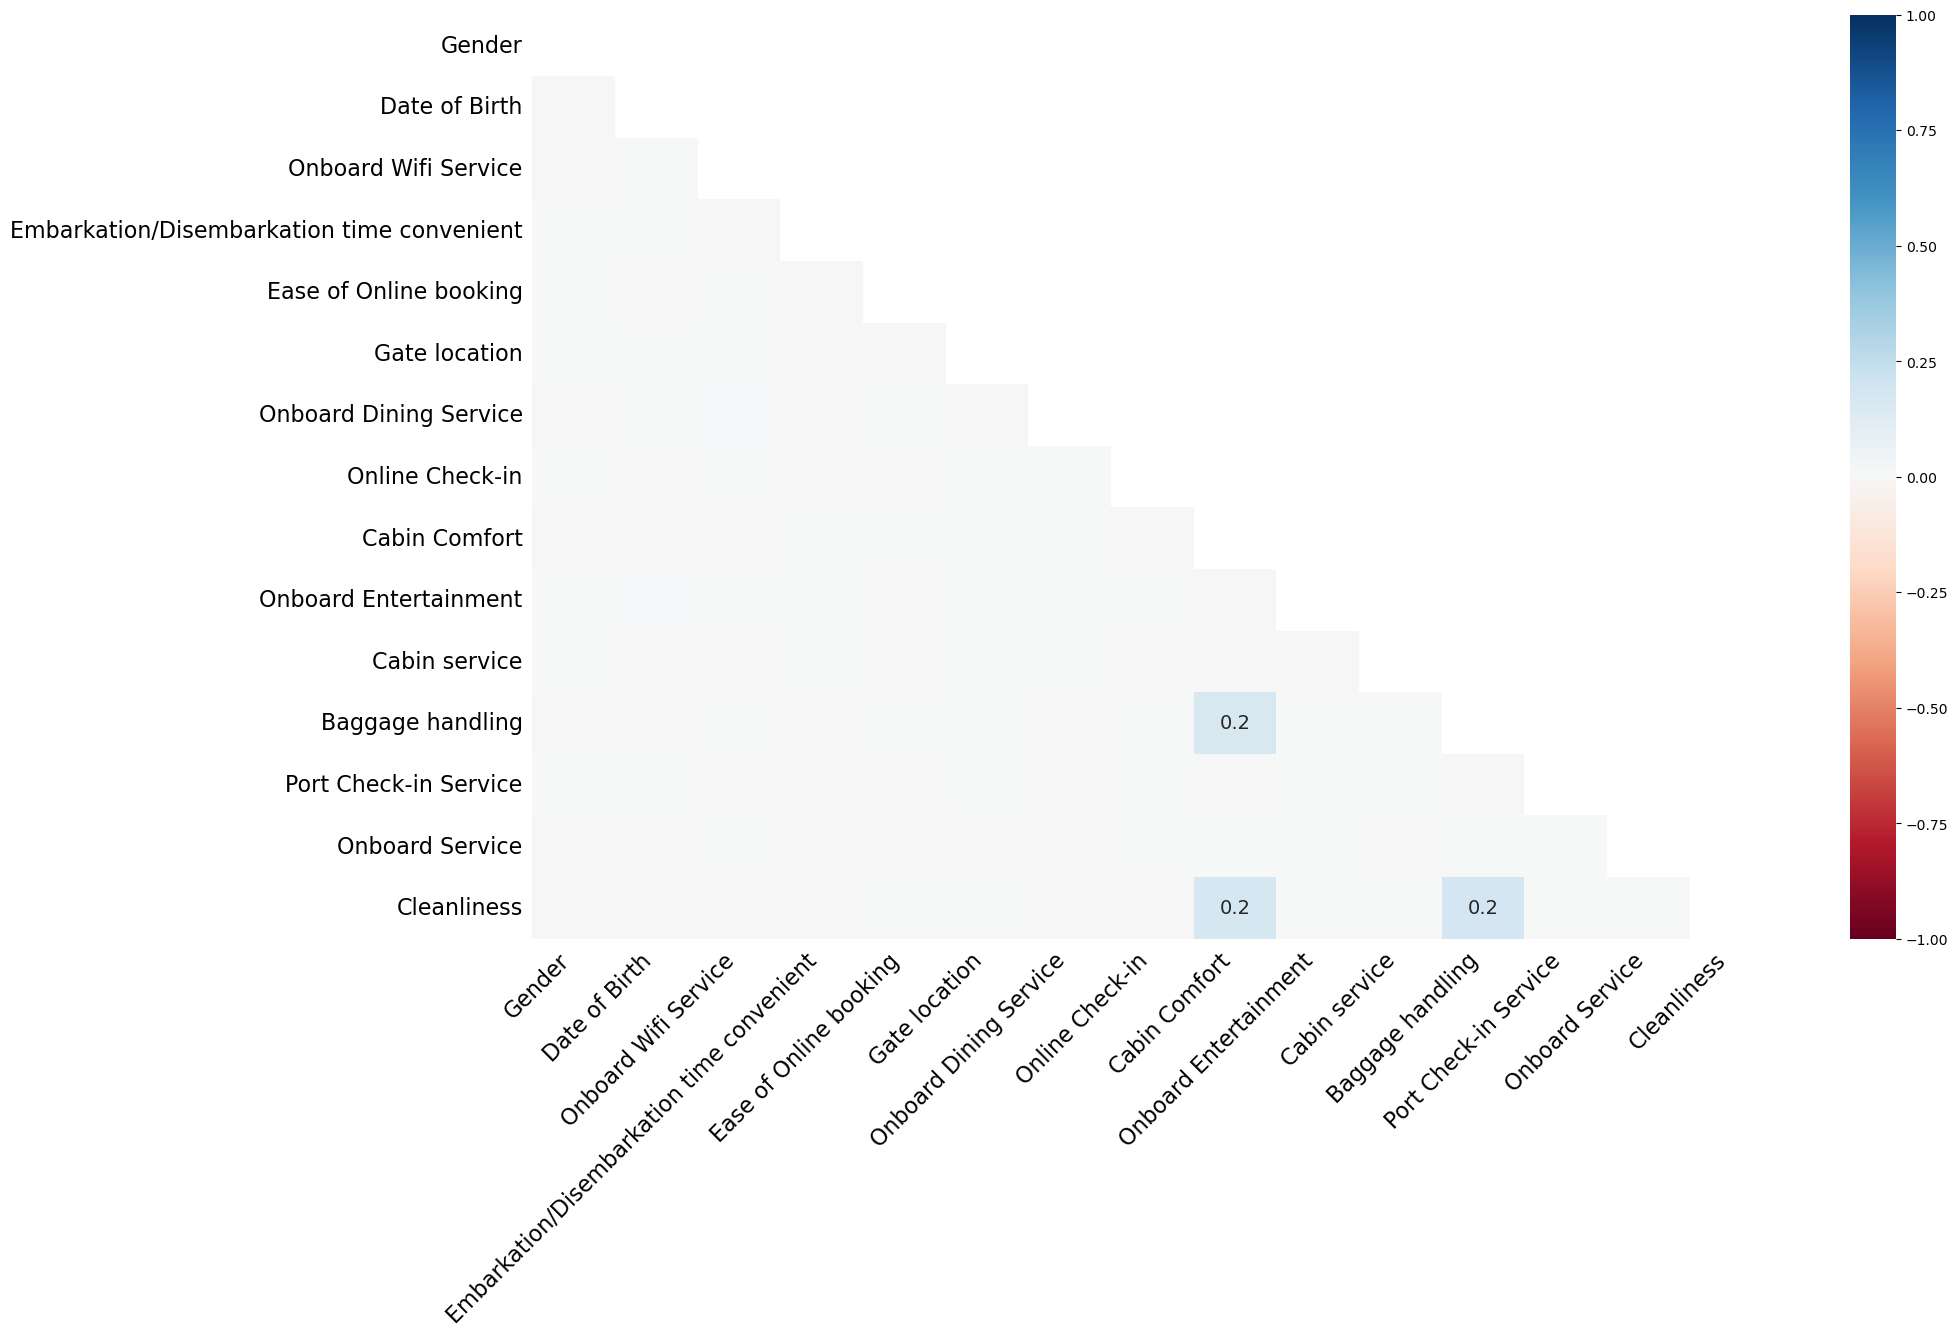

In [10]:
msno.heatmap(df_pre)

### `df_post`

<AxesSubplot:>

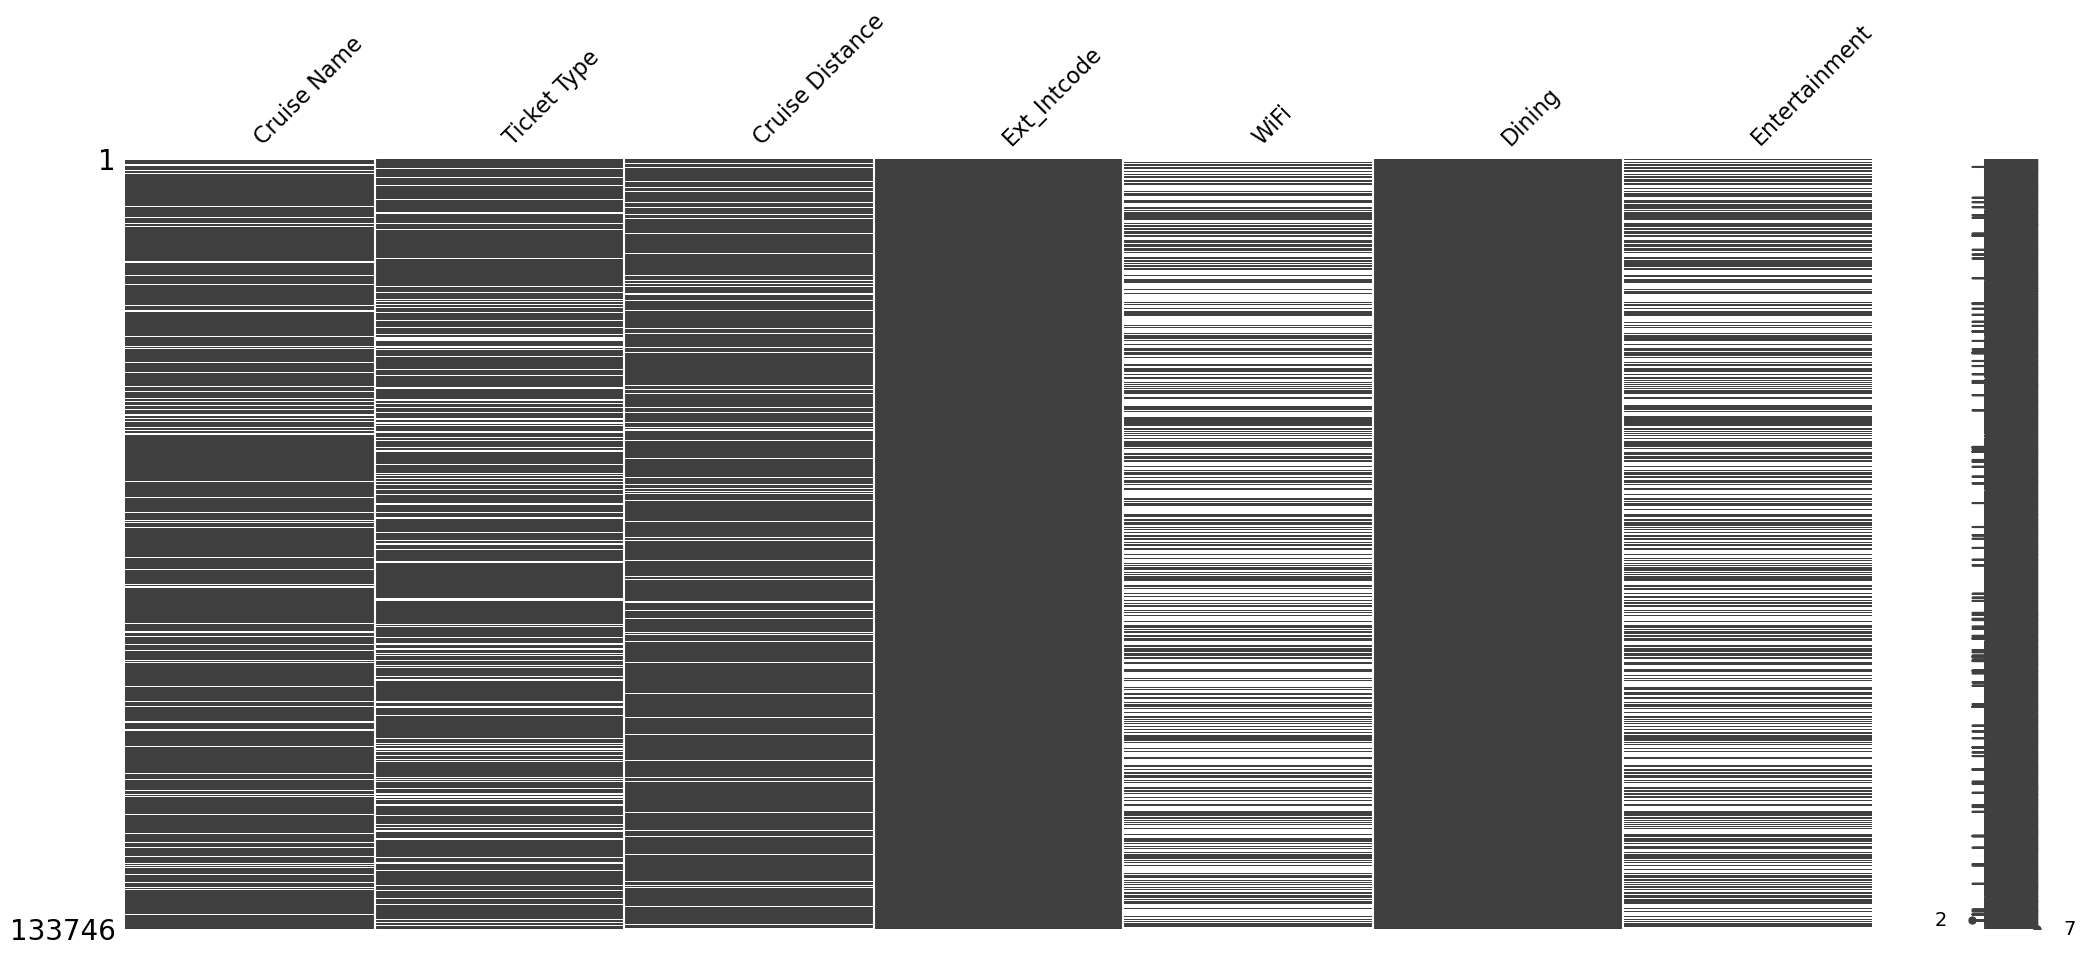

In [11]:
msno.matrix(df_post)

In [12]:
df_post.WiFi.unique()

array([ 1., nan,  0.])

<AxesSubplot:>

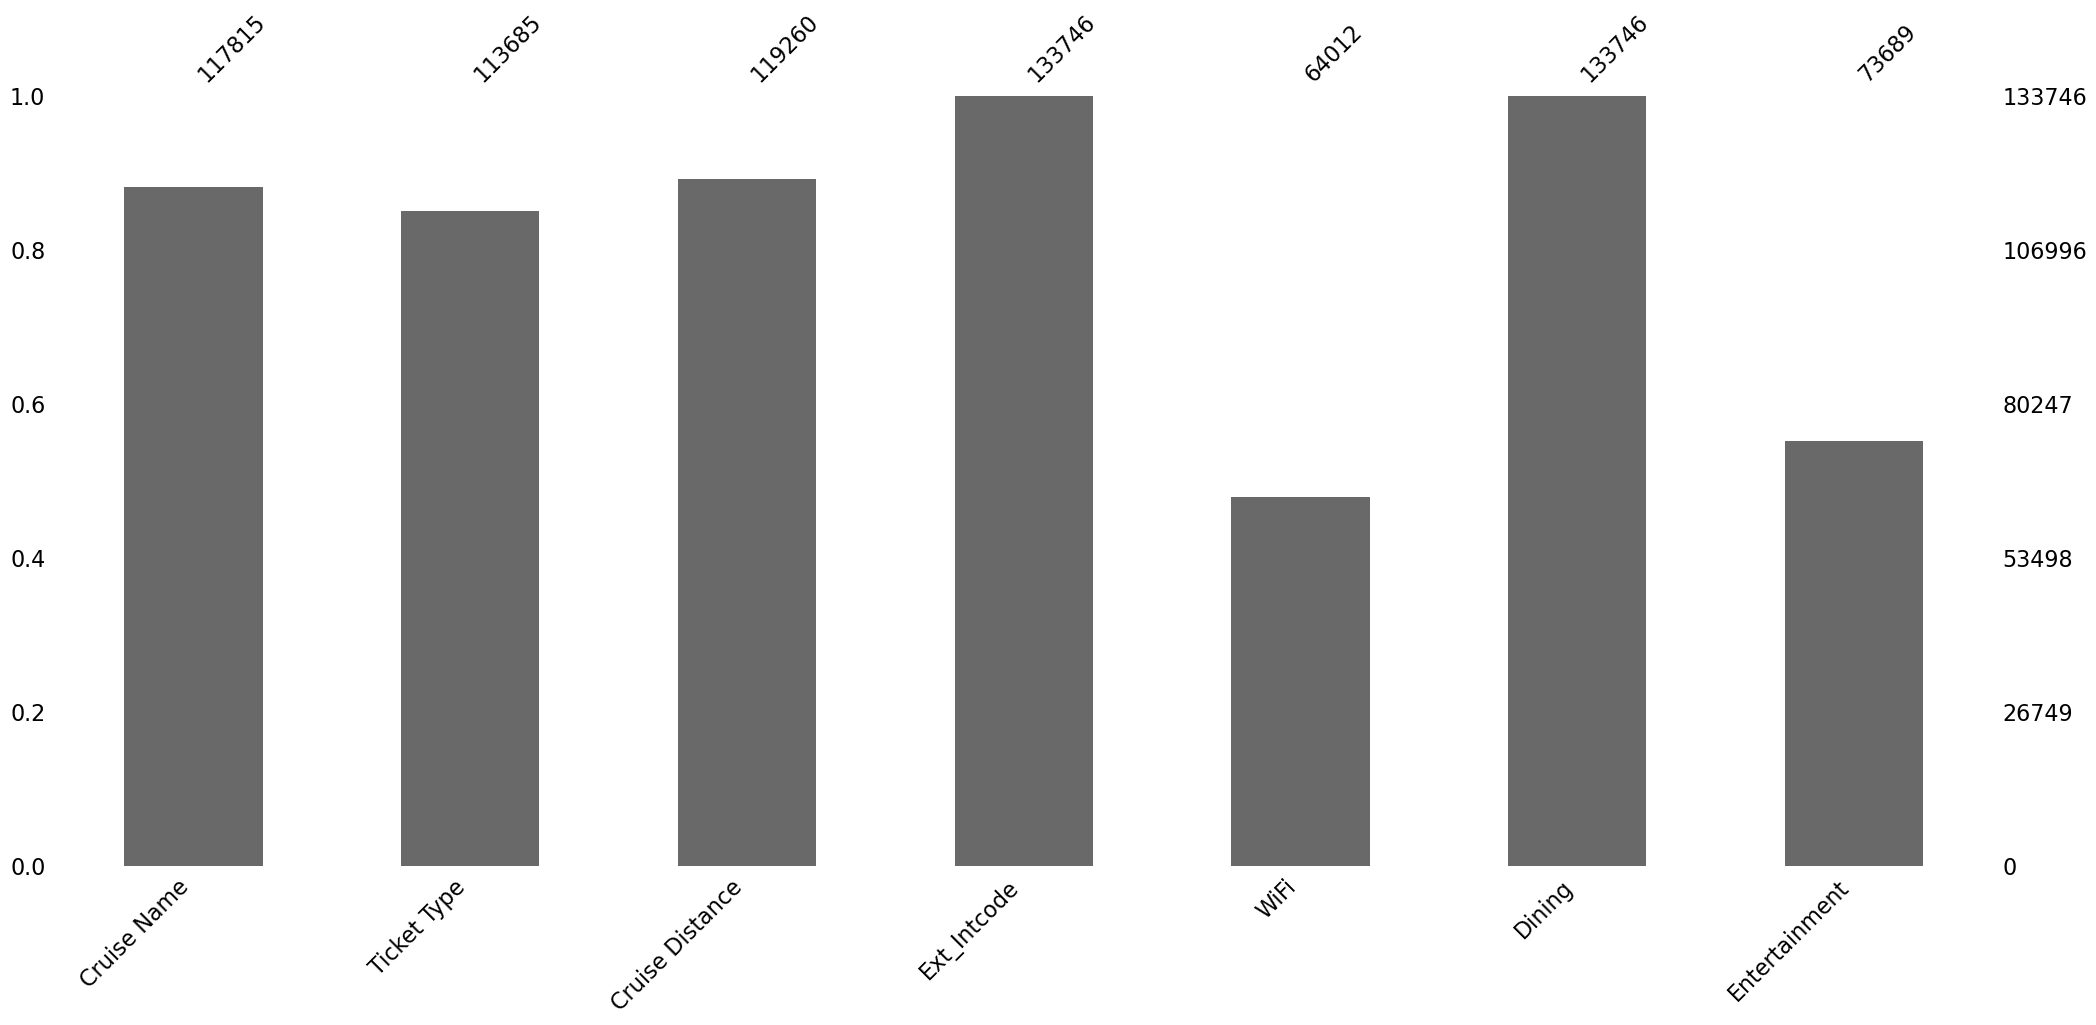

In [13]:
msno.bar(df_post)

<AxesSubplot:>

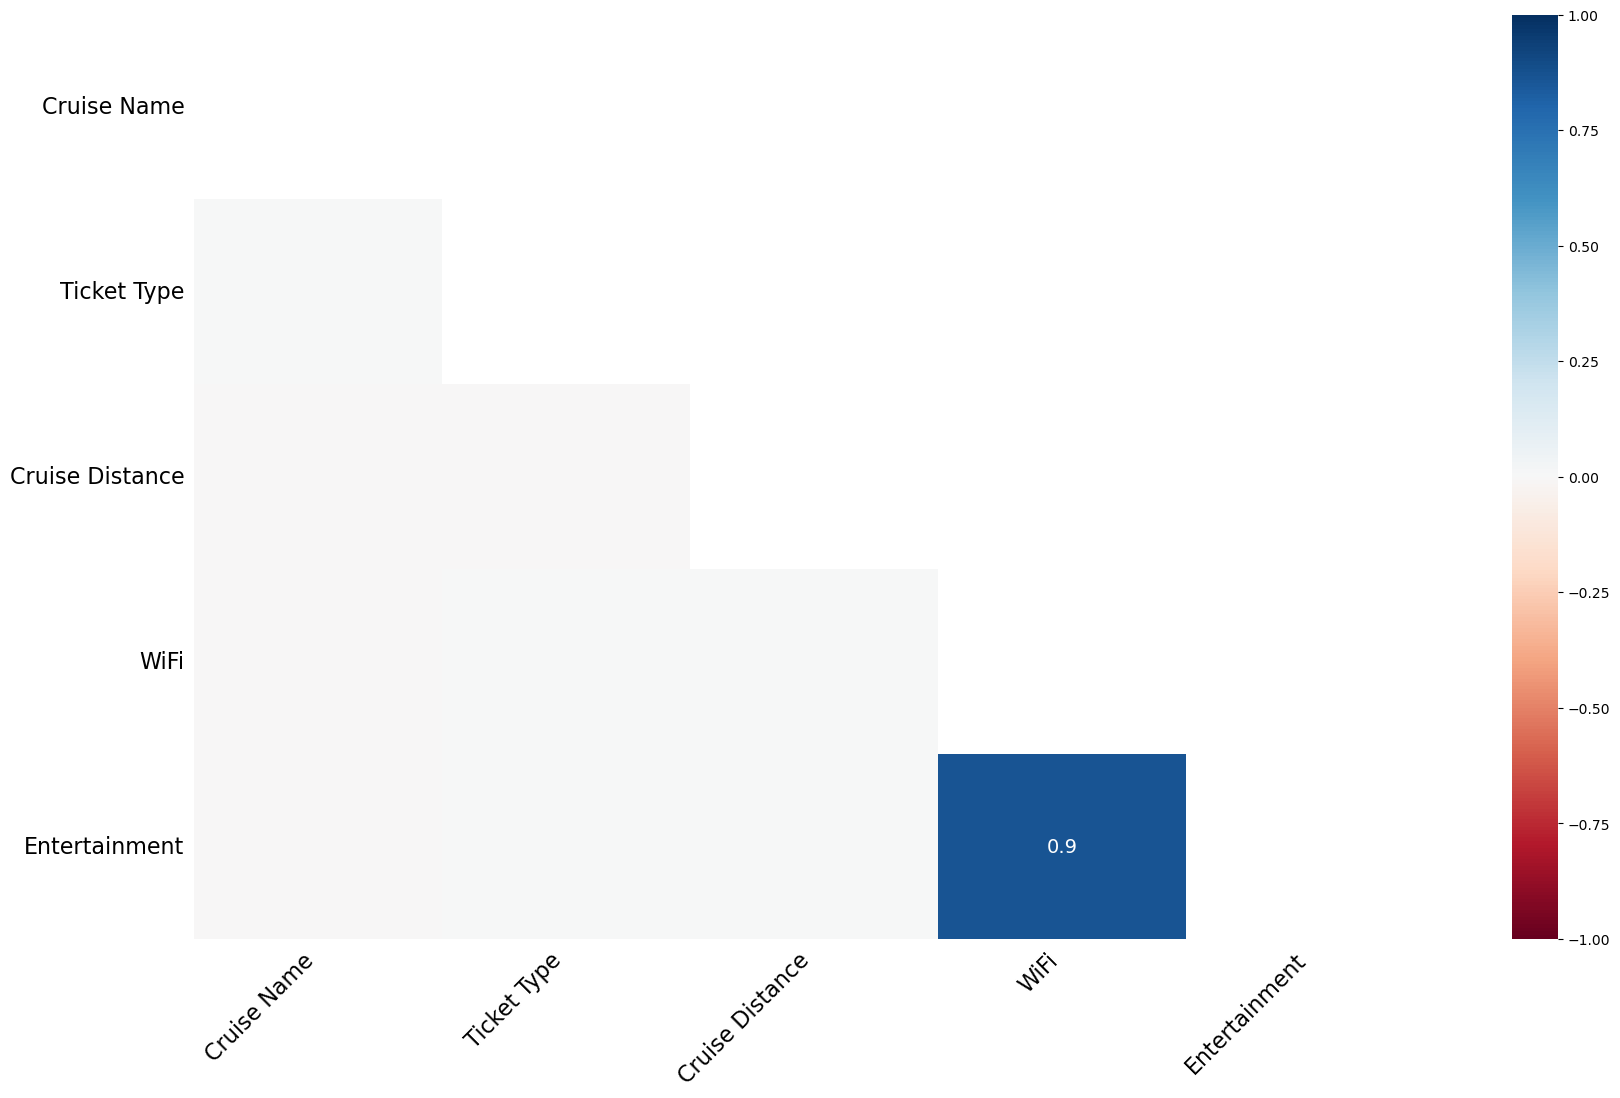

In [14]:
msno.heatmap(df_post)

### Findings

Not much dependence between occurence of missing values in `df_pre`.  
For `df_post`, also not much dependence except for `WiFi` and `Entertainment` with the value of `0.9`in the heatmap.    
The data in `df_pre` and `df_post` seesm to indicate more towards Missing At Random. They are not completely missing at random though as the heat map indicates some correlations  

source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/
 
These nans should require imputation as according to the assessment question document, customers are required to answer these questions without leaving them blank.

# Renaming  
  
For a more consistent feature naming scheme easier to use through dot operator and autocomplete

In [15]:
internal_passanger_code_text = "internal_passanger_code"

In [16]:
df_pre.rename({"Ext_Intcode":internal_passanger_code_text},axis=1,inplace=True)
df_post.rename({"Ext_Intcode":internal_passanger_code_text},axis=1,inplace=True)

def replace_spaces(x):
    return x.replace(" ","_").strip().lower()
  
df_pre.rename(replace_spaces,axis=1,inplace=True)
df_post.rename(replace_spaces,axis=1,inplace=True)

df_pre.columns

Index(['gender', 'date_of_birth', 'source_of_traffic', 'onboard_wifi_service',
       'embarkation/disembarkation_time_convenient', 'ease_of_online_booking',
       'gate_location', 'logging', 'onboard_dining_service', 'online_check-in',
       'cabin_comfort', 'onboard_entertainment', 'cabin_service',
       'baggage_handling', 'port_check-in_service', 'onboard_service',
       'cleanliness', 'internal_passanger_code'],
      dtype='object')

In [17]:
df_post.columns

Index(['cruise_name', 'ticket_type', 'cruise_distance',
       'internal_passanger_code', 'wifi', 'dining', 'entertainment'],
      dtype='object')

# Feature Engineering of Splitting and combining rows to remove duplicates

Since since there is no mentioned of unique passanger code required, I will split them to investigate
Does post trip data also have vouchers and upgrades available just like the the pre trip data? I assume there will be not.

In [18]:
df_pre_2_duplicated = df_pre.groupby(internal_passanger_code_text).size()[lambda x: x>1]
df_pre_2_duplicated.unique()

array([2])

In [19]:
df_post_2_duplicated = df_post.groupby(internal_passanger_code_text).size()[lambda x: x>1]
df_post_2_duplicated.unique()

array([2])

In [20]:
df_pre.duplicated(internal_passanger_code_text).any()

True

In [21]:
df_post.duplicated(internal_passanger_code_text).any()

True

for both cases, the max is two entries per passanger code

In [22]:
(df_pre_2_duplicated.index == df_post_2_duplicated.index).all()

True

curious one to one correspondence

In [23]:
df_pre_2_duplicated = df_pre[lambda x: x.internal_passanger_code.isin(df_pre_2_duplicated.index)]
df_post_2_duplicated = df_post[lambda x: x.internal_passanger_code.isin(df_post_2_duplicated.index)]
temp = df_post_2_duplicated.drop([internal_passanger_code_text],axis=1)
df_2_duplicated = pd.concat([df_pre_2_duplicated,temp],axis=1)
df_split_1 = df_2_duplicated.drop_duplicates(internal_passanger_code_text,keep='first',ignore_index=True)
df_split_2 = df_2_duplicated.drop_duplicates(internal_passanger_code_text,keep='last',ignore_index=True)

comparision =df_split_1.compare(df_split_2)
comparision.head(10)

logging                  cabin_comfort       baggage_handling  \
              self            other          self other             self   
0  01/01/2023 0:06  01/01/2023 0:11           NaN   1.0              NaN   
1  01/01/2023 0:21  01/01/2023 0:26           NaN   5.0              NaN   
2  01/01/2023 1:05  01/01/2023 1:10           NaN   NaN              NaN   
3  01/01/2023 1:14  01/01/2023 1:19           NaN   4.0              NaN   
4  01/01/2023 1:32  01/01/2023 1:37           NaN   1.0              NaN   
5  01/01/2023 1:43  01/01/2023 1:48           NaN   5.0              NaN   
6  01/01/2023 3:43  01/01/2023 3:48           NaN   3.0              NaN   
7  01/01/2023 6:28  01/01/2023 6:33           NaN   4.0              NaN   
8  01/01/2023 7:42  01/01/2023 7:47           NaN   5.0              NaN   
9  01/01/2023 7:44  01/01/2023 7:49           NaN   4.0              NaN   

        cleanliness       ticket_type          
  other        self other        self   other  
0   3.0         NaN   1.0         NaN     NaN  
1   4.0         NaN   5.0         NaN     NaN  
2   4.0         NaN   5.0         NaN     NaN  
3   4.0         NaN   4.0         NaN     NaN  
4   2.0         NaN   1.0    Standard    None  
5   1.0         NaN   5.0         NaN     NaN  
6   NaN         NaN   5.0         NaN     NaN  
7   NaN         NaN   4.0         NaN     NaN  
8   3.0         NaN   5.0         NaN     NaN  
9   4.0         NaN   4.0        None  Luxury

In [24]:
df_split_1.compare(df_split_2).count()

logging           self     3896
                  other    3896
cabin_comfort     self        0
                  other    3423
baggage_handling  self        0
                  other    3416
cleanliness       self        0
                  other    3480
ticket_type       self      479
                  other     546
dtype: int64

In [25]:
comparision.ticket_type = comparision.ticket_type.fillna("")

In [26]:
df_split_2.loc[:,"ticket_type"] = comparision.ticket_type.self + comparision.ticket_type.other
df_split_2.ticket_type.unique()

/tmp/ipykernel_377631/150239904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split_2.loc[:,"ticket_type"] = comparision.ticket_type.self + comparision.ticket_type.other


array(['', 'Standard', 'Luxury', 'Deluxe'], dtype=object)

Selecting df_split_2

I am combining df_post and df_pre data that has no repeated `internal_passanger_code`

In [27]:
post_single_code= df_post[lambda x: ~x.internal_passanger_code.isin(df_split_2.internal_passanger_code)].drop(internal_passanger_code_text,axis=True)
pre_single_code= df_pre[lambda x: ~x.internal_passanger_code.isin(df_split_2.internal_passanger_code)]
print((pre_single_code.index == post_single_code.index).all())
df_single_code = pd.concat([pre_single_code,post_single_code],axis=1)  

df = pd.concat([df_split_2,df_single_code],ignore_index=True)

True


Some have about 30 days difference

### Findings

There are repeated `internal_passanger_code`, After spliting the duplicates up into different dataframes and comparing them, I am selecting `df_split_2` on the most part.  

With the exception of `ticket_type` as some have categories and some don't, using the help of compare(). I combined the both dataframe's `ticket_type` into one.


# Splitting into features and target

`ticket_type` is the target and some `tick_type` data with  `nan`s or empty strings are dropped because it is not possible to impute such data. 

In [28]:
(df.ticket_type == "").any() or df.ticket_type.isna().any()

True

In [29]:
df.ticket_type.unique()

array(['', 'Standard', 'Luxury', 'Deluxe', None], dtype=object)

In [30]:
df = df[~df.ticket_type.isna() & ~(df.ticket_type == "")]
df.ticket_type.isna().any() or (df.ticket_type == "").any()

False

In [31]:
# temp = df_post.drop([internal_passanger_code_text]
# df = pd.concat([df_pre,temp],axis=1,)
df_x = df.drop(["ticket_type"],axis =1)
df_x.set_index(internal_passanger_code_text,drop=True,inplace=True)

df_y = df.ticket_type

In [32]:
df_x.head()

,gender,date_of_birth,source_of_traffic,onboard_wifi_service,embarkation/disembarkation_time_convenient,ease_of_online_booking,gate_location,logging,onboard_dining_service,online_check-in,...,cabin_service,baggage_handling,port_check-in_service,onboard_service,cleanliness,cruise_name,cruise_distance,wifi,dining,entertainment
internal_passanger_code,,,,,,,,,,,,,,,,,,,,,
LB325CKADFV,Male,15/11/1987,Indirect - Social Media,Not at all important,1.0,1.0,2.0,01/01/2023 1:37,Not at all important,1.0,...,5.0,2.0,5.0,NaN,1.0,Blastoise,956 KM,NaN,1,NaN
LB408SLCDQB,Male,14/06/1962,Direct - Email Marketing,Extremely important,5.0,4.0,5.0,01/01/2023 7:49,Very important,5.0,...,4.0,4.0,4.0,4.0,4.0,Blastoise,2349 KM,1.0,0,1.0
LB525KQZVEE,Male,19/06/2010,Direct - Email Marketing,None,5.0,NaN,4.0,01/01/2023 14:35,A little important,2.0,...,4.0,4.0,3.0,4.0,2.0,Lapras,1788 KM,NaN,0,1.0
LB536JGQUWI,None,18/11/1995,Direct - Email Marketing,Somewhat important,3.0,3.0,3.0,01/01/2023 23:54,Extremely important,5.0,...,4.0,4.0,5.0,5.0,5.0,Blastoise,486 KM,1.0,0,1.0
BL653TIKHKA,Female,02/09/1979,Direct - Company Website,Somewhat important,NaN,5.0,3.0,02/01/2023 14:10,Somewhat important,5.0,...,4.0,4.0,5.0,4.0,5.0,None,1464 KM,1.0,0,0.0


In [33]:
df_x.columns

Index(['gender', 'date_of_birth', 'source_of_traffic', 'onboard_wifi_service',
       'embarkation/disembarkation_time_convenient', 'ease_of_online_booking',
       'gate_location', 'logging', 'onboard_dining_service', 'online_check-in',
       'cabin_comfort', 'onboard_entertainment', 'cabin_service',
       'baggage_handling', 'port_check-in_service', 'onboard_service',
       'cleanliness', 'cruise_name', 'cruise_distance', 'wifi', 'dining',
       'entertainment'],
      dtype='object')

# Feature Engineering of `cruise_distance`

It was in "xx km", i should only extract the first split

In [34]:
df_x.cruise_distance = df_x.cruise_distance.str.split(" ").str[0]

In [35]:
# df_x["cruise_distance"] = df_x.cruise_distance.astype(int)

# Feature Engineering of `date_of_birth` to `age` with the type of `int`

Easier to compare with each other through age demographic.

In [36]:
df.date_of_birth.isna().any()

True

In [37]:
df.date_of_birth.sample(10)

90766     23/07/1971
70404     16/02/1975
113574    05/02/1994
120063    10/02/1965
72124           None
31577     27/01/1980
107550    06/07/1983
31268     28/08/1963
21163     25/03/2000
10374     15/02/1963
Name: date_of_birth, dtype: object

In [38]:

df_x["temp_1"] = pd.to_datetime(df_x.date_of_birth,format="%Y-%m-%d",errors='coerce')
df_x["temp_2"] = pd.to_datetime(df_x.date_of_birth,format="%d/%m/%Y",errors='coerce')
df_x["date_of_birth"] = df_x.temp_1.fillna(df_x.temp_2)
df_x.drop(["temp_1","temp_2"],axis=1,inplace=True)
# https://stackoverflow.com/questions/60390709/working-with-mixed-datetime-formats-in-pandas


def age(born):
    if str(born) == "NaT": 
        return born
    born = datetime.strptime(str(born), "%Y-%m-%d %H:%M:%S").date()
    today = datetime.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
df_x["age"] = df_x.date_of_birth.apply(age).fillna(0).astype(str).astype(int)
df_x.drop("date_of_birth",axis=1,inplace=True)

df_x.age.isna().any()

False

In [39]:
df.date_of_birth.sample(10)

96757     02/07/1993
31981     09/09/1989
17388     07/10/1974
70087     28/12/1990
68276     15/11/1953
69785     03/03/1971
128442    11/05/1996
77501     25/06/1984
106720    21/11/1980
51906     08/05/1989
Name: date_of_birth, dtype: object

In [40]:
df_x.age.sample(10)

internal_passanger_code
LB906LYSQKM    34
BL820QMIBEB    66
LB167ZHMUJB    52
BL783JEWSLT     0
BL381MYIGPN    51
LB584KXNYGO    23
LB272GQVUFZ    22
LB844PSZMGA    45
BL509QDKQUS    40
LB324GVSKJG    22
Name: age, dtype: int64

# feature engineering for `logging`
  
For easier feature selection processing of `loggin`

In [41]:
df_x["logging"] = pd.to_datetime(df_x.logging).astype(int)

# Encoders and Nan imputation

[According to `scikit-learn`](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation), they state that multiple imputation is an open problem on how useful it is compared  to simple imputation.`InterativeImputer` is still at the experimental stage and have know technical issues.

Unlike `SimpleImputer` which imputes with just a single value, `KNNIMputer` is more sophisticated as it impute based on surrounding data of a feature. It may be better. However `KNNImputer` is very slow on my machine so `SimpleImputer` is used instead.

<!-- A/B testing may still be needed in the ML pipeline to see which option is more optimal. -->

[I should not always use `OrdinalEncoder`, not all features has some sort of order, for example `gender` doesn't have this](https://stackoverflow.com/questions/69052776/ordinal-encoding-or-one-hot-encoding), so `ColumnTransformer` is used for this step.

`LabelEncoder` is meant for encoding labels/targets/y.

In [42]:
df_x[["wifi","entertainment"]]=df_x[["wifi","entertainment"]].fillna(-1)
df_x[["wifi","entertainment"]]

,wifi,entertainment
internal_passanger_code,,
LB325CKADFV,-1.0,-1.0
LB408SLCDQB,1.0,1.0
LB525KQZVEE,-1.0,1.0
LB536JGQUWI,1.0,1.0
BL653TIKHKA,1.0,0.0
...,...,...
LB147HGFXMK,0.0,0.0
LB569ACEIRB,-1.0,-1.0
BL862YWCXGQ,-1.0,-1.0


In [43]:
ordinal_encoder_categories = [ 'onboard_wifi_service',
       'embarkation/disembarkation_time_convenient', 'ease_of_online_booking',
       'gate_location', 'onboard_dining_service', 'online_check-in',
       'cabin_comfort', 'onboard_entertainment', 'cabin_service',
       'baggage_handling', 'port_check-in_service', 'onboard_service',
       'cleanliness']
one_hot_encoder_categories = ["gender","source_of_traffic","cruise_name"]
# age,logging,cruise_distance,wifi,entertainment,dining

simple_imputer = SimpleImputer(strategy='median')
label_encoder = LabelEncoder()
column_transformer = ColumnTransformer(
[
    ('ordinal_encoder',OrdinalEncoder(),ordinal_encoder_categories),
    ('one_hot_encoder',OneHotEncoder(sparse=False),one_hot_encoder_categories),
], remainder='passthrough', verbose_feature_names_out=False
)
column_transformer.fit(df_x)
columns = column_transformer.get_feature_names_out()

df_x = pd.DataFrame( column_transformer.fit_transform(df_x),columns = columns)
df_x = simple_imputer.fit_transform(df_x)
# df_y = label_encoder.fit_transform(df_y)

# Feature Selection

In order to understand what features are more important, I have used `SelectPercentile` to narrow down all features. `SelectKBest` can also feature select as well as `SelectPercentile`.

In [44]:
select_percentile = SelectPercentile(percentile=70)
df_x = select_percentile.fit_transform(df_x,label_encoder.fit_transform(df_y))
columns = [columns[a] for a in select_percentile.get_support(True)]
df_x = pd.DataFrame(df_x,columns=columns)

df_x.head()

,onboard_wifi_service,embarkation/disembarkation_time_convenient,ease_of_online_booking,gate_location,online_check-in,cabin_comfort,onboard_entertainment,cabin_service,baggage_handling,port_check-in_service,...,source_of_traffic_Direct - Company Website,source_of_traffic_Direct - Email Marketing,source_of_traffic_Indirect - Search Engine,source_of_traffic_Indirect - Social Media,cruise_name_Blastoise,cruise_name_Lapras,cruise_distance,wifi,entertainment,age
0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,5.0,1.0,4.0,...,0.0,0.0,0.0,1.0,1.0,0.0,956.0,-1.0,-1.0,35.0
1,1.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2349.0,1.0,1.0,61.0
2,5.0,5.0,3.0,4.0,2.0,2.0,0.0,4.0,3.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1788.0,-1.0,1.0,13.0
3,3.0,3.0,3.0,3.0,5.0,5.0,1.0,4.0,3.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,486.0,1.0,1.0,27.0
4,3.0,3.0,5.0,3.0,5.0,4.0,4.0,4.0,3.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1464.0,1.0,0.0,44.0


In [45]:
df_x.describe()

,onboard_wifi_service,embarkation/disembarkation_time_convenient,ease_of_online_booking,gate_location,online_check-in,cabin_comfort,onboard_entertainment,cabin_service,baggage_handling,port_check-in_service,...,source_of_traffic_Direct - Company Website,source_of_traffic_Direct - Email Marketing,source_of_traffic_Indirect - Search Engine,source_of_traffic_Indirect - Social Media,cruise_name_Blastoise,cruise_name_Lapras,cruise_distance,wifi,entertainment,age
count,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,...,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000,108113.000000
mean,2.454330,3.050253,2.788074,2.981251,3.219483,3.508135,2.506498,3.447911,2.678383,2.271642,...,0.407675,0.408665,0.091959,0.091700,0.516783,0.233015,988.638073,-0.281474,-0.171311,39.582613
std,1.722123,1.434417,1.304989,1.193375,1.272419,1.249194,1.670067,1.233065,1.108446,1.201999,...,0.491405,0.491589,0.288970,0.288604,0.499721,0.422754,1115.696648,0.825682,0.834411,32.208426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4963.000000,-1.000000,-1.000000,0.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,390.000000,-1.000000,-1.000000,23.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,752.000000,-1.000000,0.000000,38.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1504.000000,0.000000,1.000000,51.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4983.000000,1.000000,1.000000,223.000000


In [181]:
label_encoder = LabelEncoder()

df_y_encoded = label_encoder.fit_transform(df_y)
df_y_encoded

/home/ryan/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 1, 0, ..., 2, 1, 2])

# seaborn pairplot and heatmap  
  
`pairplot` and `heatmap` used to find correlateions between features.

In [47]:
# df_x.ticket_type.unique()
selected_columns = [column for column in df_x.columns.to_list() if "one_hot_" not in column ]

In [48]:
# sns.pairplot(df_x[selected_columns]) # TODO uncomment this before submission

<AxesSubplot:>

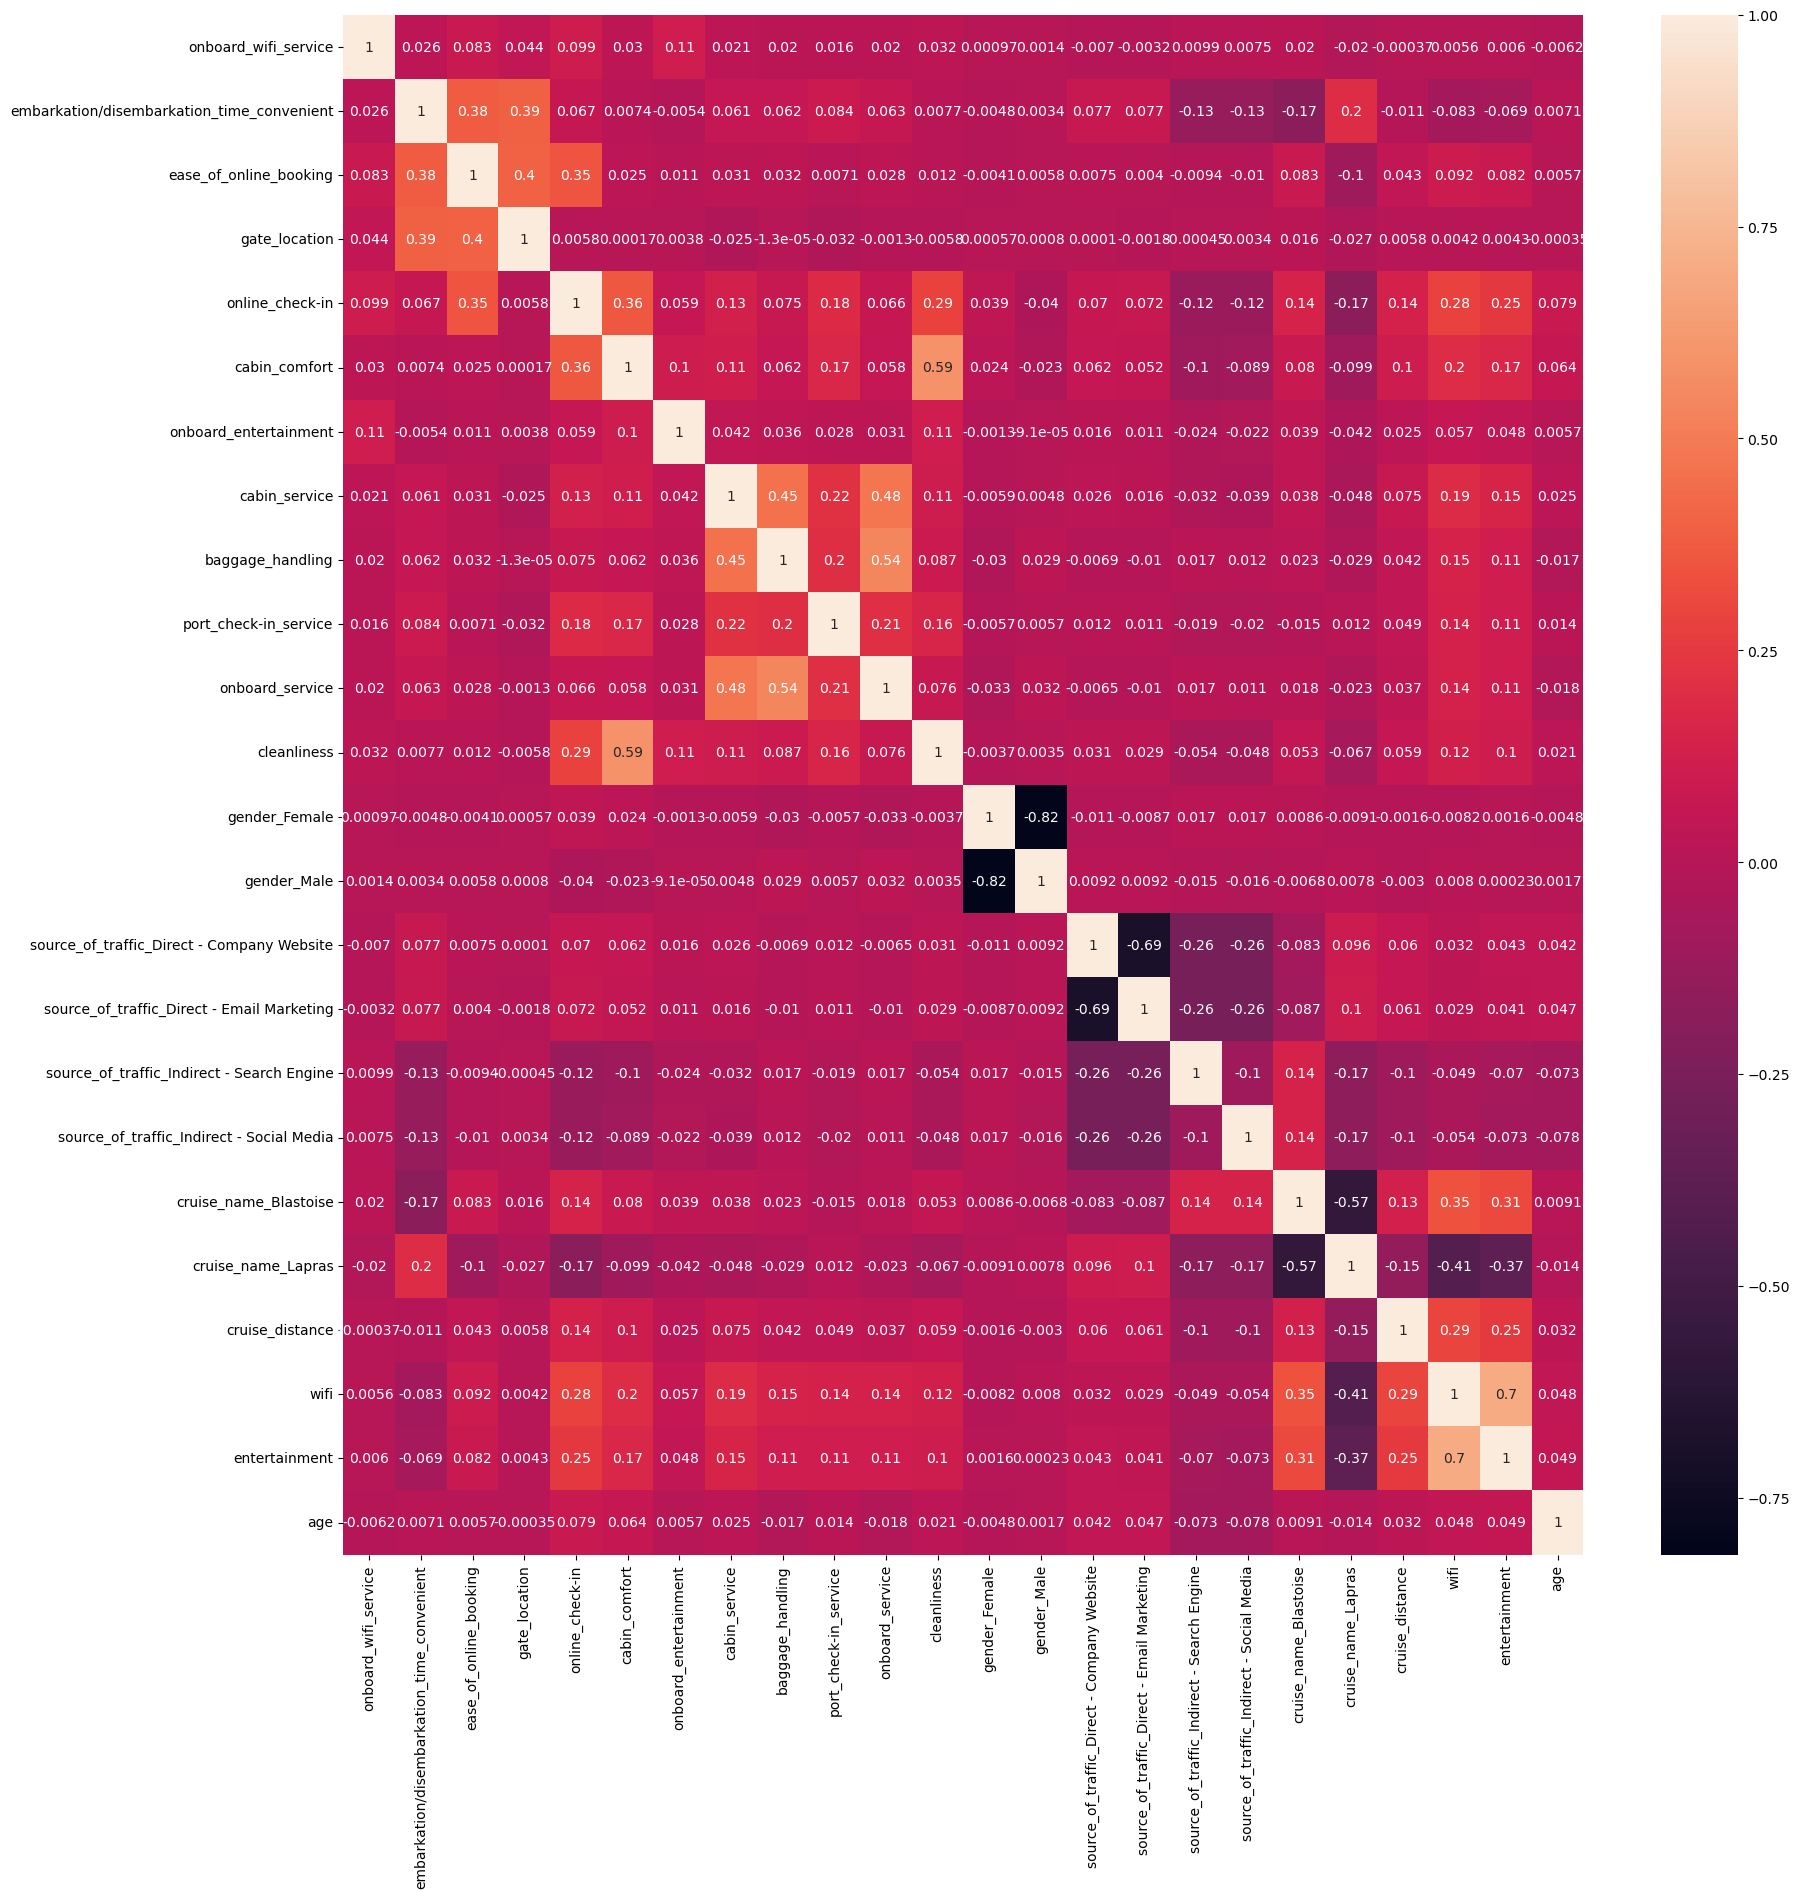

In [49]:
plt.figure(figsize=[20,20])
sns.heatmap(df_x[selected_columns].corr(),annot=True)

### findings
`pairplot` has no visually discernable correlations to pick up
`heatmap` has more correlation information:  
  
<b>Choosing correlations that are more than 0.28 and less than 1 via the codes below<b>  
      
the correlations are not too strong to the poiont where dropping features is necessary.

In [192]:
correlations_of_interest =df_x[selected_columns].corr()

result = []
for series in  correlations_of_interest.items():
    text =""
    for i,s1 in enumerate(series):
        if i%2==0:
            text = s1 
        else:
            for text2,s2 in zip(correlations_of_interest,s1):
                if text != text2 and s2 > 0.28 and (text,text2,s2) not in result:
                    result.append((text2,text,s2))

correlations_of_interest = pd.DataFrame(result,columns=["feature1","feature2","correlation"])\
                            .sort_values(["correlation"]).reset_index(drop=True)

In [193]:
correlations_of_interest

,feature1,feature2,correlation
0,wifi,online_check-in,0.283210
1,cleanliness,online_check-in,0.287802
2,wifi,cruise_distance,0.292231
3,entertainment,cruise_name_Blastoise,0.311012
4,wifi,cruise_name_Blastoise,0.346938
5,online_check-in,ease_of_online_booking,0.350546
6,cabin_comfort,online_check-in,0.364741
7,ease_of_online_booking,embarkation/disembarkation_time_convenient,0.381275
8,gate_location,embarkation/disembarkation_time_convenient,0.390985
9,gate_location,ease_of_online_booking,0.397544


In [ ]:
gate location, wifi, entertaionment, cruise name,cruise distance

# Useful Visualisations

<AxesSubplot:xlabel='ticket_type', ylabel='Count'>

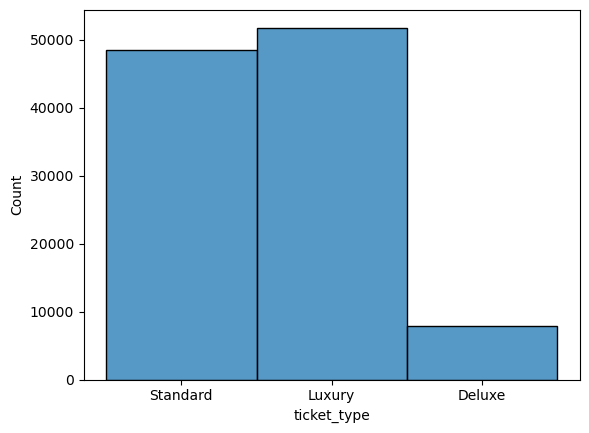

In [168]:
df_y = pd.DataFrame(df_y,columns=["ticket_type"])
df = pd.concat([df_x,df_y],axis=1)

sns.histplot(df_y,x="ticket_type")

/tmp/ipykernel_377631/2733285742.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_yticklabels(a1.get_yticks(), rotation =90)


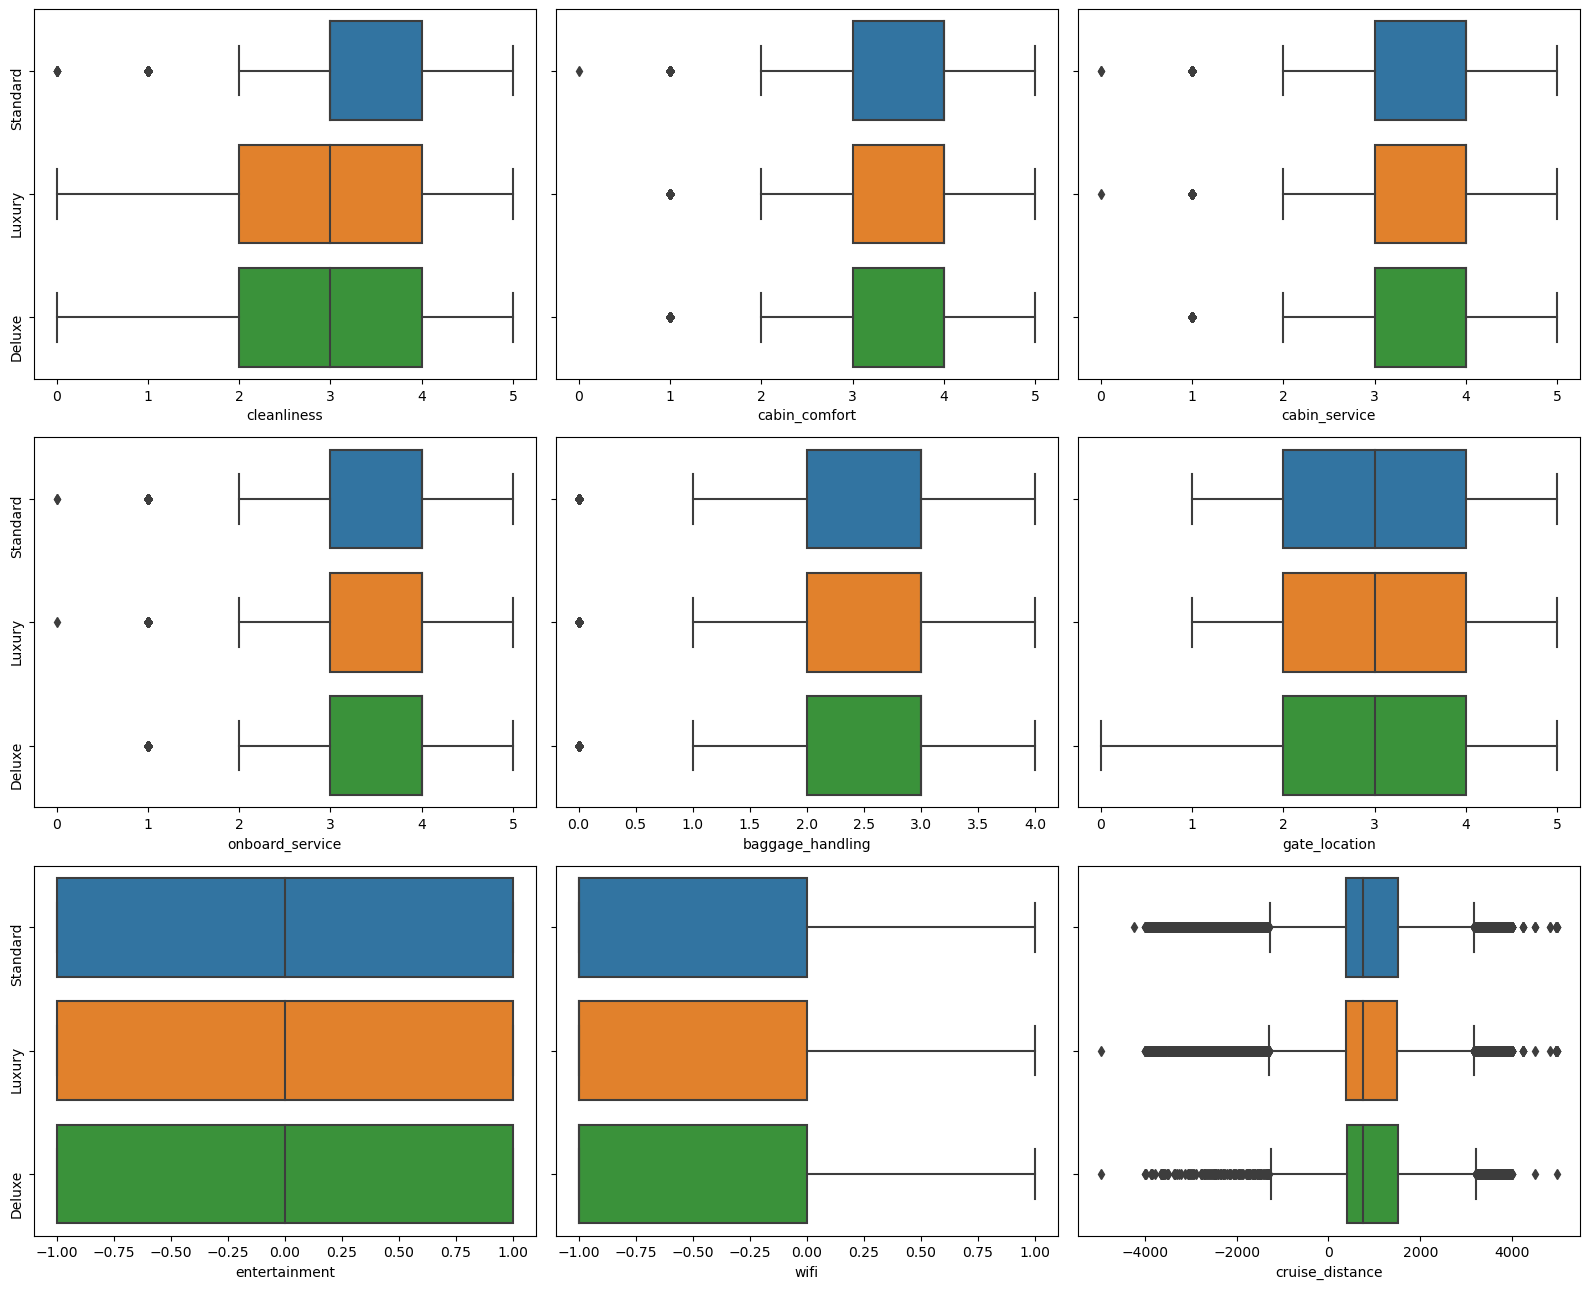

In [196]:
fig, ((a1,a2,a3),(a4,a5,a6),(a7,a8,a9))=plt.subplots(3,3,figsize =(16,13),sharey=True)

a1.set_yticklabels(a1.get_yticks(), rotation =90)
b1= sns.boxplot( data=df, y='ticket_type', x='cleanliness',ax=a1)
b1.set(ylabel=None)
b2=sns.boxplot(data=df, x='cabin_comfort', y='ticket_type',ax=a2)
b2.set(ylabel=None)
b3=sns.boxplot(data=df, x='cabin_service', y='ticket_type', ax=a3)
b3.set(ylabel=None)
a4.set_yticklabels(a4.get_yticks(), rotation =90)
b4= sns.boxplot( data=df, y='ticket_type', x='onboard_service',ax=a4)
b4.set(ylabel=None)
b5= sns.boxplot( data=df, y='ticket_type', x='baggage_handling',ax=a5)
b5.set(ylabel=None)
b6= sns.boxplot( data=df, y='ticket_type', x='gate_location',ax=a6)
b6.set(ylabel=None)

a7.set_yticklabels(a7.get_yticks(), rotation =90)
b7= sns.boxplot( data=df, y='ticket_type', x='entertainment',ax=a7)
b7.set(ylabel=None)
b8= sns.boxplot( data=df, y='ticket_type', x='wifi',ax=a8)
b8.set(ylabel=None)
b9= sns.boxplot( data=df, y='ticket_type', x='cruise_distance',ax=a9)
b9.set(ylabel=None)
plt.tight_layout()

## findings

Highly imbalanced dataset, I will use `SMOTE` in my pipeline to counter this.

These features selected and box plotted from `correlations of interest` from most correlated duples as seen on the correlation heatmap  

<b>From box plots:<b>  
    
`Standard` ticket holders holds the importance of cleanliness higher than `Luxuary` and `Deluxe`  

<b>From Heatmap:<b>  
 `Lapras` cruise has dissatisfaction about  `entertainment` and `wifi` while `blastoise` has more positive correlations about `entertainment`,`wifi`. it coinsides with the indirect `source of traffic` a notch.
      
 `cruise distance` has slight positive correlation with `wifi` and `dining`? Unsure on how to interpretate this; probably not much to gain from this insight.